<div style="text-align: center;">
    <h1><b>ANN model for the task of predicting real estate prices</b></h1>
</div>


In the pridicting_house_prices analysis, we have analyzed real estate prices, let's use it to predict prices using the neural network method

<div style="text-align: center;">
    <h1><b>Importing libraries and loading data</b></h1>
</div>

In [145]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<div style="text-align: center;">
    <h1><b>Data exploration</b></h1>
</div>

/Users/lipton/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


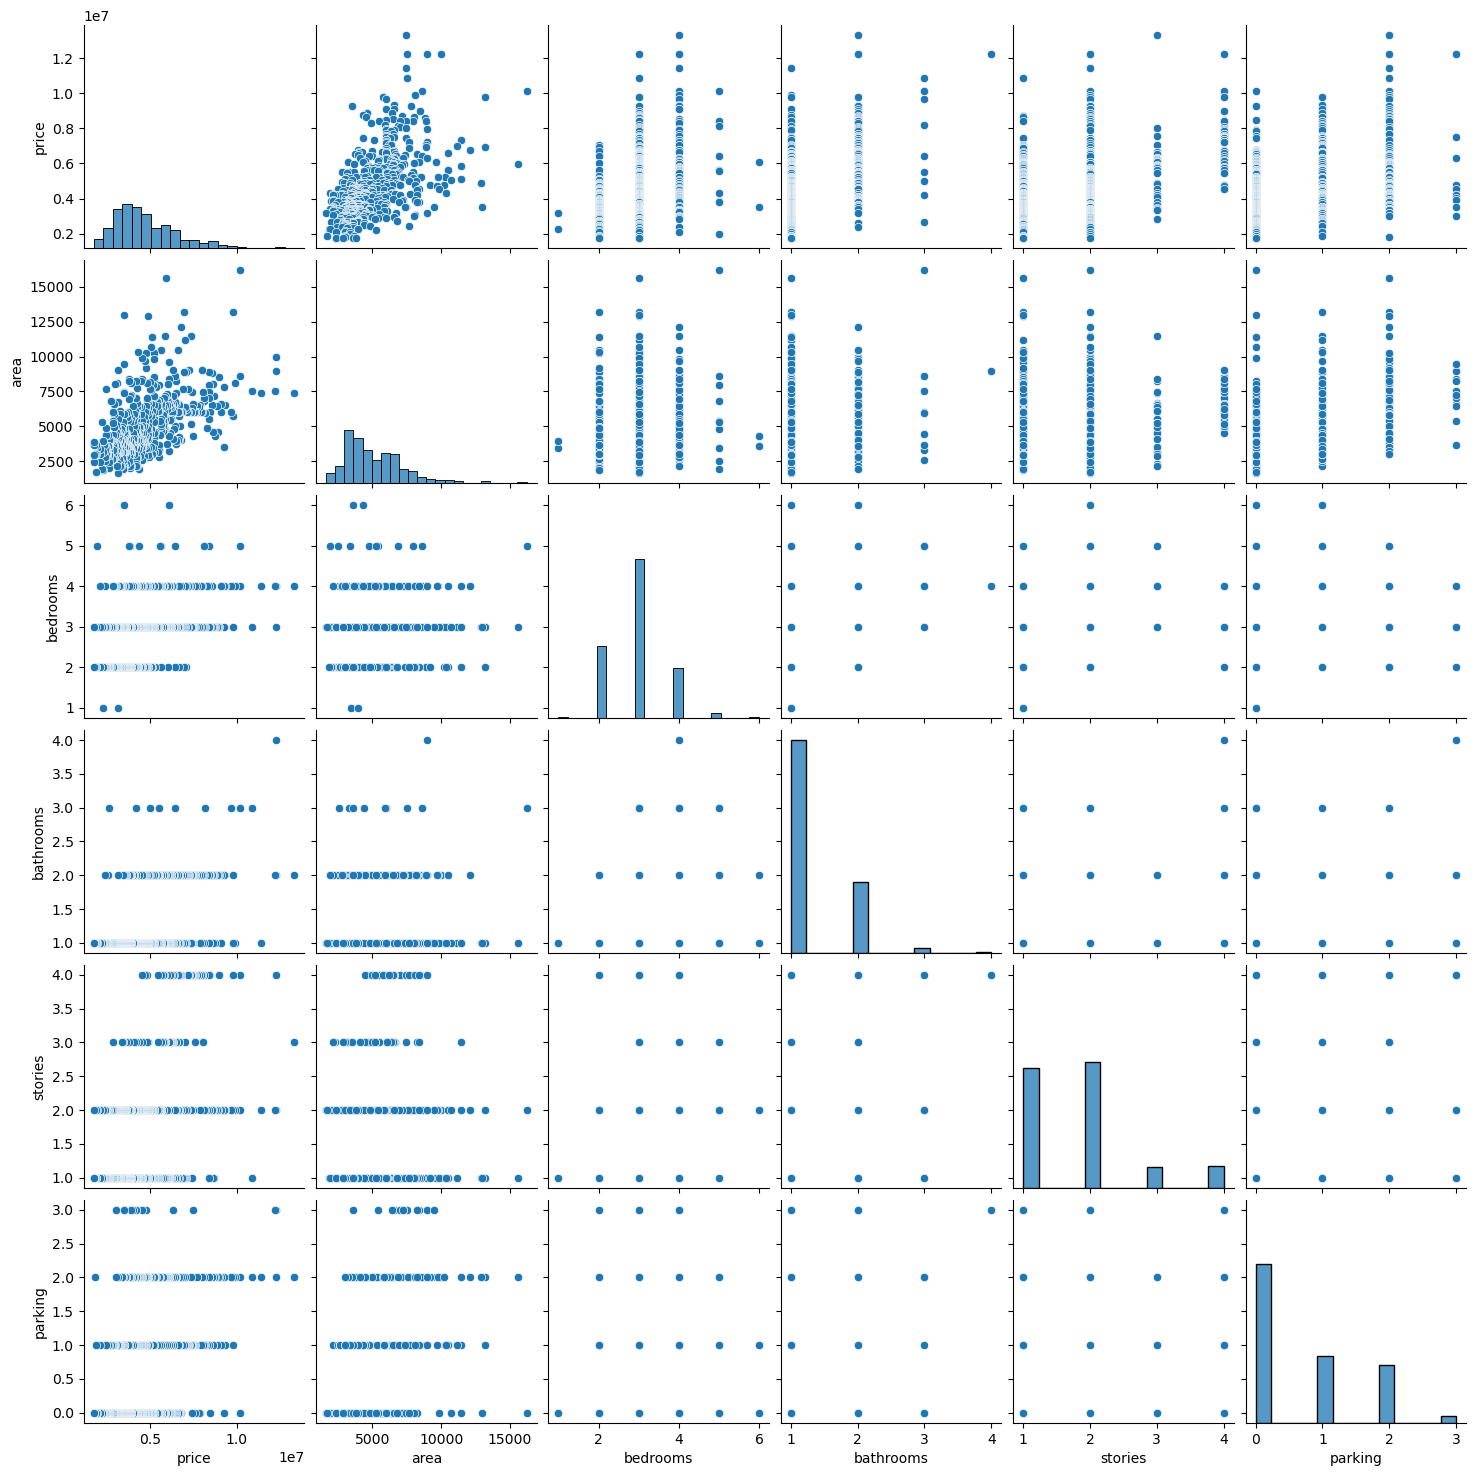

In [2]:
sns.pairplot(df)
plt.show()

## conclusions

We can see some valuable information in the pairplot
- the bathrooms column contains a significant outlier for variable 4
- the bedrooms column contains a significant outlier for variable 6
- the area column contains outliers for values above 12000
- the price column contains outliers for values above 1.2

<div style="text-align: center;">
    <h1><b>Preprocessing</b></h1>
</div>

<div style="text-align: center;">
    <h2><b>Removing outliers</b></h2>
</div>

In [146]:
# Removing outliers from categorical data

df = df.drop(df[df['bathrooms'] == 4].index)
df = df.drop(df[df['bedrooms'] == 6].index)

In [147]:
# Function to remove outliers using the IQR method for a data frame
def remove_outliers_iqr_dataframe(df):
    Q1_price = np.percentile(df['price'], 25)
    Q3_price = np.percentile(df['price'], 75)
    IQR_price = Q3_price - Q1_price
    lower_bound_price = Q1_price - 1.5 * IQR_price
    upper_bound_price = Q3_price + 1.5 * IQR_price
    
    Q1_area = np.percentile(df['area'], 25)
    Q3_area = np.percentile(df['area'], 75)
    IQR_area = Q3_area - Q1_area
    lower_bound_area = Q1_area - 1.5 * IQR_area
    upper_bound_area = Q3_area + 1.5 * IQR_area
    
    # Remove rows containing outliers for 'price' and 'area' columns
    df = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price) &
                    (df['area'] >= lower_bound_area) & (df['area'] <= upper_bound_area)]
    
    return df

# Remove outliers for the entire data frame
df = remove_outliers_iqr_dataframe(df)

# Display the size of the modified data
print("Data size after removing outliers:", len(df))


Data size after removing outliers: 518


<div style="text-align: center;">
    <h2><b>data distribution after removing outliers</b></h2>
</div>

/Users/lipton/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


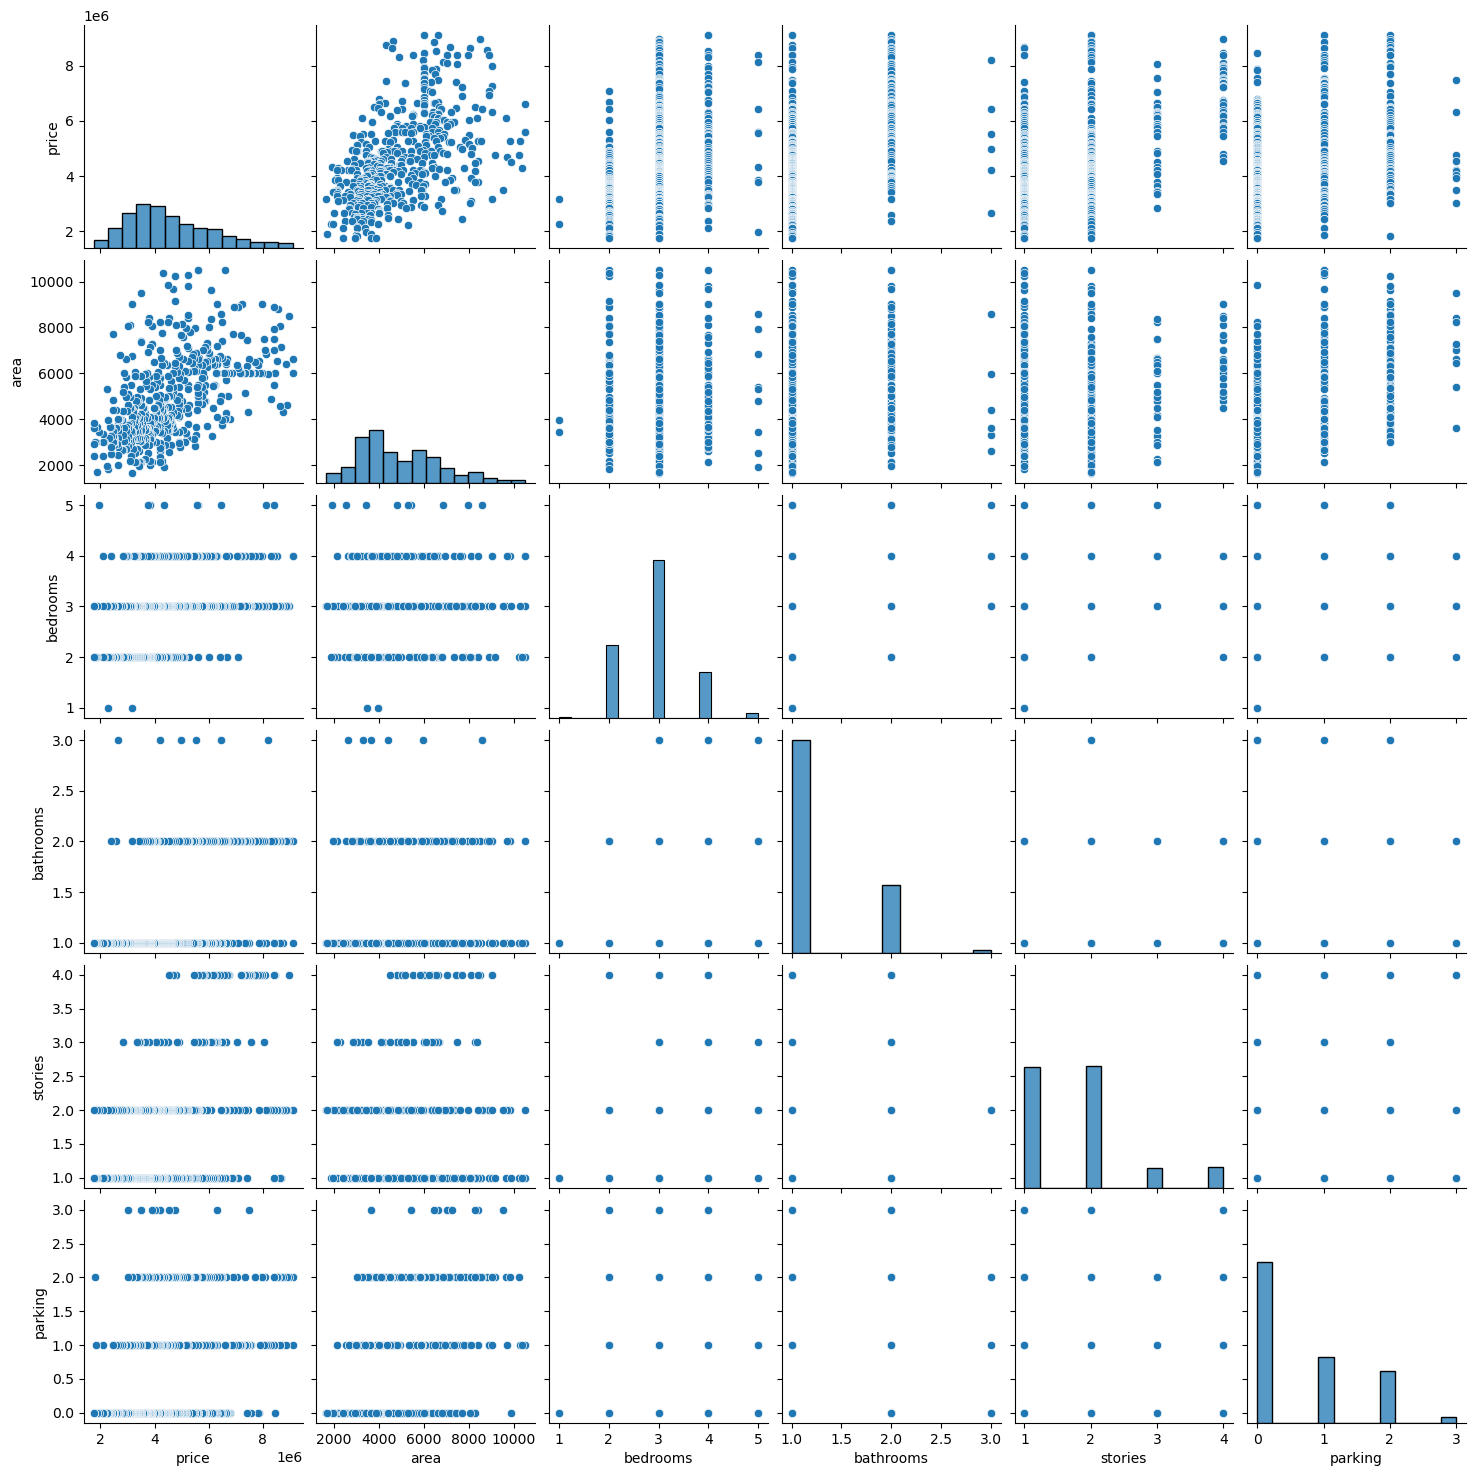

In [5]:
sns.pairplot(df)
plt.show()

<div style="text-align: center;">
    <h2><b>data mapping</b></h2>
</div>

In [148]:
# Mapping columns to values 1/0
mapping = {'yes': 1, 'no': 0}
columns_to_map = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in columns_to_map:
    df[col] = df[col].map(mapping)
    
    
# Mapping furnishingstatus column

df_furnishing = pd.get_dummies(df['furnishingstatus'], drop_first=True)
df_furnishing = df_furnishing.astype(int)

# Usunięcie oryginalnej kolumny 'furnishingstatus'
df.drop(columns=['furnishingstatus'], inplace=True)

# Łączenie ramki danych z zmapowaną kolumną 'furnishingstatus'
df = pd.concat([df, df_furnishing], axis=1)


df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


<div style="text-align: center;">
    <h2><b>histograms before standardization for numeric columns</b></h2>
</div>

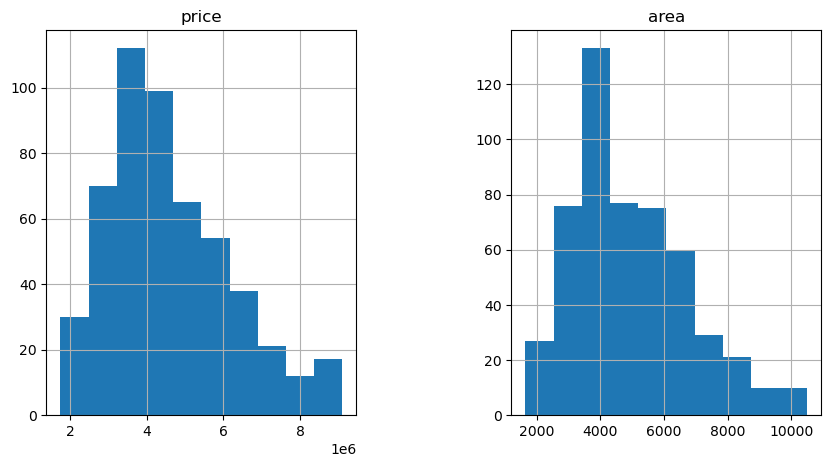

In [109]:
df[['price', 'area']].hist(figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

<div style="text-align: center;">
    <h2><b>standardization</b></h2>
</div>

In [149]:
from sklearn.preprocessing import StandardScaler

# List of numeric columns to standardize
columns_to_standardize = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardization of selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Display the transformed data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,2.839116,0.588396,1.511046,-0.563893,0.241064,1,0,1,0,0,1.596649,0,1,0
16,2.839116,0.917179,1.511046,1.583876,0.241064,1,1,1,0,1,0.408339,1,0,1
17,2.751258,1.958324,0.098191,1.583876,2.553495,1,0,0,0,1,1.596649,0,0,0
18,2.707329,-0.178763,0.098191,1.583876,0.241064,1,1,0,0,1,1.596649,0,0,0
19,2.685364,0.818544,0.098191,1.583876,0.241064,1,0,0,0,1,0.408339,1,1,0


<div style="text-align: center;">
    <h2><b>histograms after standardization for numeric columns</b></h2>
</div>

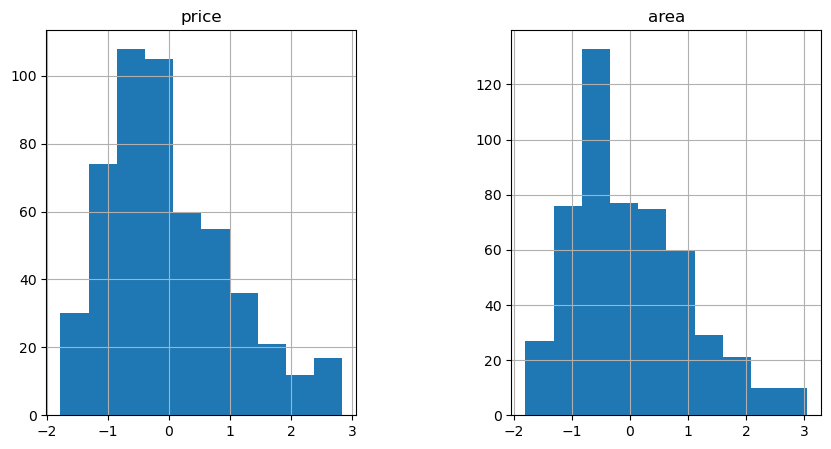

In [111]:
df[['price', 'area']].hist(figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

## Conclusions
- standardization has been applied
- the histogram of numerical data did not approximate normal form, perhaps the use of other standardization/normalization methods could help

<div style="text-align: center;">
    <h1><b>Feature Importance</b></h1>
</div>


<div style="text-align: center;">
    <h2><b>data correlation chart</b></h2>
</div>

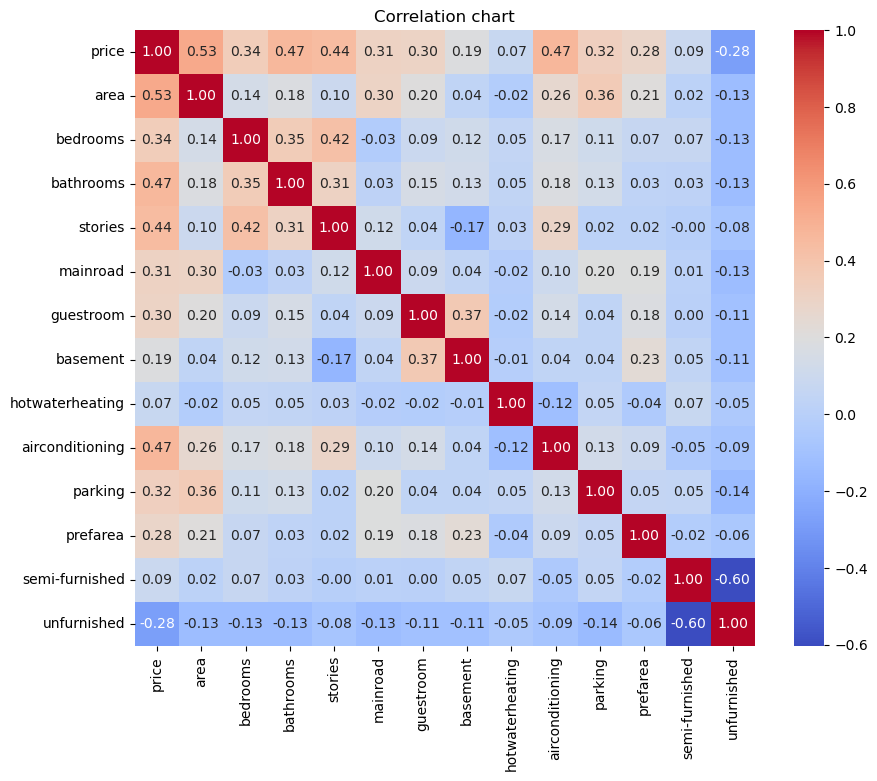

In [112]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation chart')
plt.show()

### The chart shows that:
- the area, bedrooms, bathrooms, stories, airconditioning, mainroad, guestroom variables have a strong correlation with the price variable
- the unfurnished variable has a negative correlation with the price variable
- the hotwaterheating and semi-frunished variable is irrelevant

<div style="text-align: center;">
    <h2><b>Splitting into training and test set</b></h2>
</div>

In [150]:
from sklearn.model_selection import train_test_split

# Splitting data into features (X) and dependent variables (y)
X = df.drop(columns=['price'])
y = df['price']

# Splitting of data into training set (65%) and test set (35%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Display the sizes of the sets
print("Data sizes:")
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Data sizes:
Training set: (336, 13) (336,)
Test set: (182, 13) (182,)


<div style="text-align: center;">
    <h2><b>Plot of explained variance (PCA method)</b></h2>
</div>

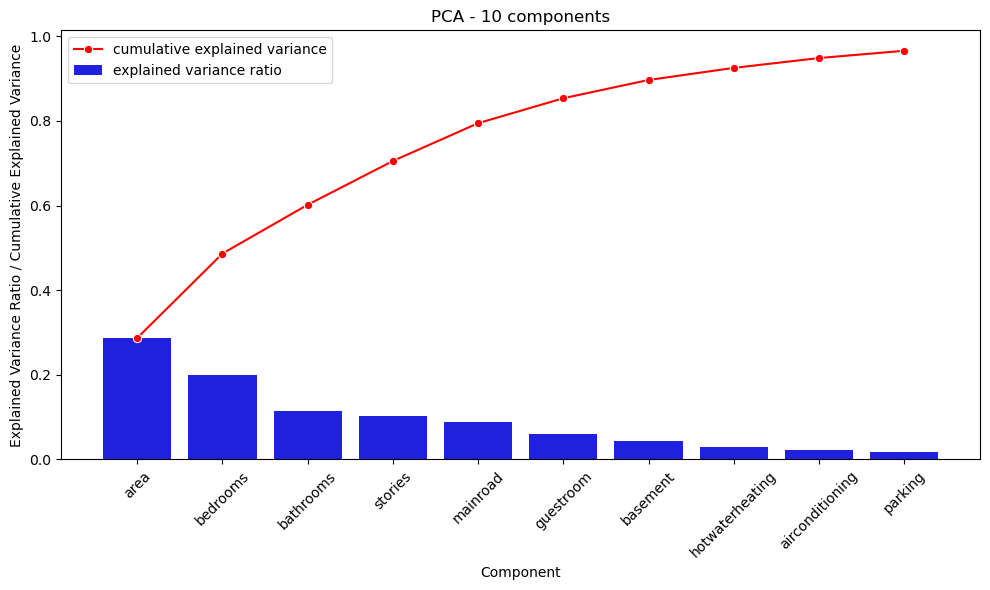

In [114]:
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# Before PCA transformation
column_names = X_train.columns.tolist()

# Create a PCA object
pca = PCA(n_components=0.95)

# Fitting and transforming training data
X_train_pca = pca.fit_transform(X_train)

# Create a data frame with explained_variance_ratio_ and cumulative
results_df = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results_df['cumulative'] = results_df['explained_variance_ratio'].cumsum()
results_df['component'] = column_names[:pca.n_components_]

# Plot of explained variance
plt.figure(figsize=(10, 6))
sns.barplot(x='component', y='explained_variance_ratio', data=results_df, color='blue', label='explained variance ratio')
sns.lineplot(x='component', y='cumulative', data=results_df, color='red', marker='o', label='cumulative explained variance')

# Add title and labels
plt.title(f'PCA - {pca.n_components_} components')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio / Cumulative Explained Variance')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.legend()
plt.tight_layout()
plt.show()

## conclusions

Based on experiments with the model results, I decided to remove the hotwaterheating and semi-furnished column, which is irrelevant to the model. Further removal of data that has a low level of explained variation results in loss of information for the models

<div style="text-align: center;">
    <h2><b>remove of the hotwaterheating column</b></h2>
</div>

In [151]:
df = df.drop(columns=['hotwaterheating'])
df = df.drop(columns=['semi-furnished'])

<div style="text-align: center;">
    <h1><b>Model building</b></h1>
</div>

In [152]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K

# R2 metrics definition

def r2_metric(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Neural network model definition
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Model compilation
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', r2_metric])
model.summary()


/Users/lipton/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

<div style="text-align: center;">
    <h1><b>Model training</b></h1>
</div>

In [153]:
# EarlyStopping object definition
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Model training using EarlyStopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0609 - mae: 0.8207 - mse: 1.0635 - r2_metric: -0.3644 - val_loss: 0.7591 - val_mae: 0.7450 - val_mse: 0.8234 - val_r2_metric: 0.0556
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7237 - mae: 0.6614 - mse: 0.7287 - r2_metric: 0.0733 - val_loss: 0.5618 - val_mae: 0.6569 - val_mse: 0.6497 - val_r2_metric: 0.3271
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5417 - mae: 0.5755 - mse: 0.5416 - r2_metric: 0.2888 - val_loss: 0.4592 - val_mae: 0.5969 - val_mse: 0.5554 - val_r2_metric: 0.4660
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4922 - mae: 0.5428 - mse: 0.4921 - r2_metric: 0.3658 - val_loss: 0.4005 - val_mae: 0.5598 - val_mse: 0.5000 - val_r2_metric: 0.5439
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4887 - mae: 0.5297 - mse: 0.4789 - r2_metric: 0.3875 - val_loss: 0.3553 - val_mae: 0.5351 - val_mse: 0.4575 - val_r2_metric: 0.6037
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

## conclusions

the model stopped at epoch 28

<div style="text-align: center;">
    <h2><b>MSE vs. VAL_MSE chart</b></h2>
    <h2><b>R2 vs. VAL_R2 chart</b></h2>
</div>

In [139]:
import plotly.express as px
import plotly.graph_objects as go

def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['mse'], name='mse', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_mse'], name='val_mse', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='MSE vs. VAL_MSE', xaxis_title='Epochs', yaxis_title='Mean Squared Error', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['r2_metric'], name='r2_metric', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_r2_metric'], name='val_r2_metric', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='R2 vs. VAL_R2', xaxis_title='Epochs', yaxis_title='R^2', yaxis_type='log')
    fig.show()

plot_hist(history)


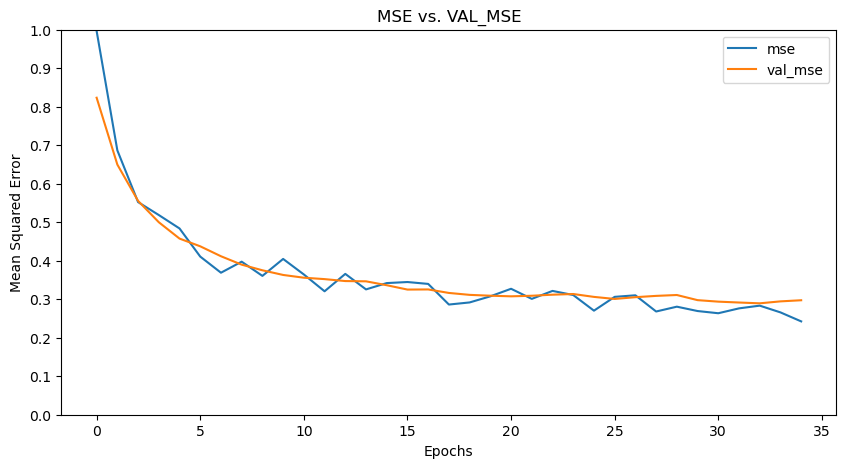

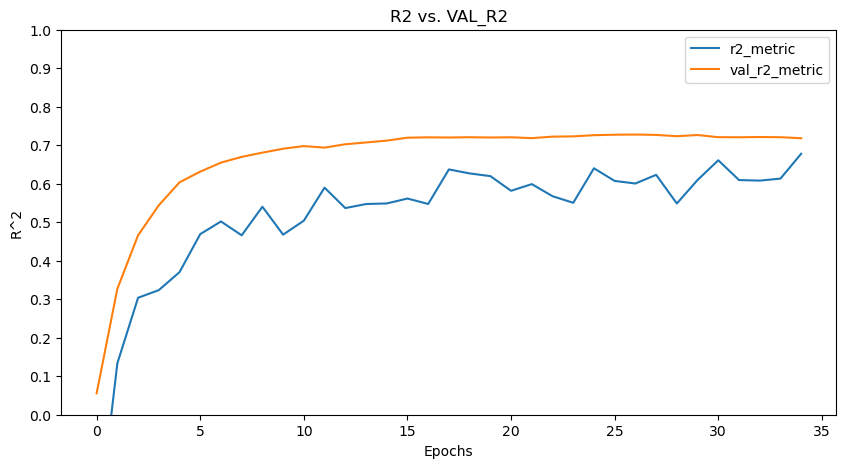

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=hist, x='epoch', y='mse', label='mse')
    sns.lineplot(data=hist, x='epoch', y='val_mse', label='val_mse')
    plt.title('MSE vs. VAL_MSE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.ylim(0, 1)  # Ustawienie zakresu dla osi Y
    plt.yticks(np.arange(0, 1.1, 0.1))  # Ustawienie etykiet dla osi Y
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=hist, x='epoch', y='r2_metric', label='r2_metric')
    sns.lineplot(data=hist, x='epoch', y='val_r2_metric', label='val_r2_metric')
    plt.title('R2 vs. VAL_R2')
    plt.xlabel('Epochs')
    plt.ylabel('R^2')
    plt.ylim(0, 1)  # Ustawienie zakresu dla osi Y
    plt.yticks(np.arange(0, 1.1, 0.1))  # Ustawienie etykiet dla osi Y
    plt.legend()
    plt.show()

plot_hist(history)



In [160]:
import plotly.graph_objects as go

def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['mse'], mode='lines', name='mse'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_mse'], mode='lines', name='val_mse'))
    fig.update_layout(width=1000, height=500, title='MSE vs. VAL_MSE', xaxis_title='Epochs', yaxis_title='Mean Squared Error', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['r2_metric'], mode='lines', name='r2_metric'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_r2_metric'], mode='lines', name='val_r2_metric'))
    fig.update_layout(width=1000, height=500, title='R2 vs. VAL_R2', xaxis_title='Epochs', yaxis_title='R^2', yaxis_type='linear')
    fig.update_yaxes(range=[0, 1])  # Ustawienie zakresu dla osi Y
    fig.show()

plot_hist(history)



## conclusions

- as we can see, MSE_VAL is decreasing, but MSE is slightly unstable
- a similar situation is in the case of R2
- overall, the model fits the validation data well
- R2 val is 0.70
- MSE val is 0.32


<div style="text-align: center;">
    <h2><b>evaluation of model results</b></h2>
</div>

In [166]:
# Prediction on training and test data
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# Calculation of the coefficient of determination (R^2) for the training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Coefficient of determination (R^2) - Training set:", r2_train)
print("Coefficient of determination (R^2) - Test set:", r2_test)
print('')

# Calculate the loss value (MSE) for the training and test set
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (MSE) - Training set:", mse_train)
print("Mean Square Error (MSE) - Test Set:", mse_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
Coefficient of determination (R^2) - Training set: 0.7117785291746893
Coefficient of determination (R^2) - Test set: 0.644881388319771

Mean Squared Error (MSE) - Training set: 0.23698501005019568
Mean Square Error (MSE) - Test Set: 0.4597803492253102


## conclusions

- After making predictions, we see that the model adapts slightly worse than to the training data
- R2 value on the test set is: 0.64
- MSE values differ between the training and test sets and the model makes errors more often in the test set

<div style="text-align: center;">
    <h2><b>data frame of errors committed</b></h2>
</div>

In [142]:
# Create a dataframe with real labels and predicted values for test data
pred = pd.DataFrame({'True Values': y_test, 'Predictions': y_test_pred})
pred['error'] = pred['True Values'] - pred['Predictions']
pred.head(10)

,True Values,Predictions,error
200,0.203364,-0.041450,0.244814
154,0.598727,-0.014085,0.612812
21,2.575541,1.076316,1.499225
103,1.016054,1.067598,-0.051544
483,-1.026654,-0.205446,-0.821208
336,-0.411645,0.451338,-0.862983
358,-0.521468,-0.534781,0.013313
91,1.156628,0.405250,0.751378
208,0.203364,-0.562418,0.765782
176,0.423010,0.450031,-0.027021


<div style="text-align: center;">
    <h2><b>residual distribution plot</b></h2>
</div>

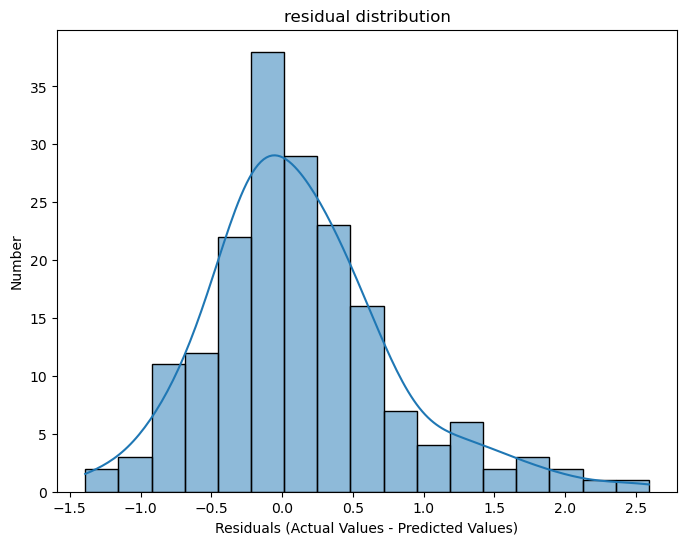

In [127]:
# Residual distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(pred['error'], kde=True)
plt.title('residual distribution')
plt.xlabel('Residuals (Actual Values - Predicted Values)')
plt.ylabel('Number')
plt.show()

## conclusions

- the distribution of residuals is irregular with values >= 30 around 0 on x axis and a longer tail of errors > 1.5 on the x-axis

<div style="text-align: center;">
    <h2><b>Actual vs Predicted chart</b></h2>
</div>

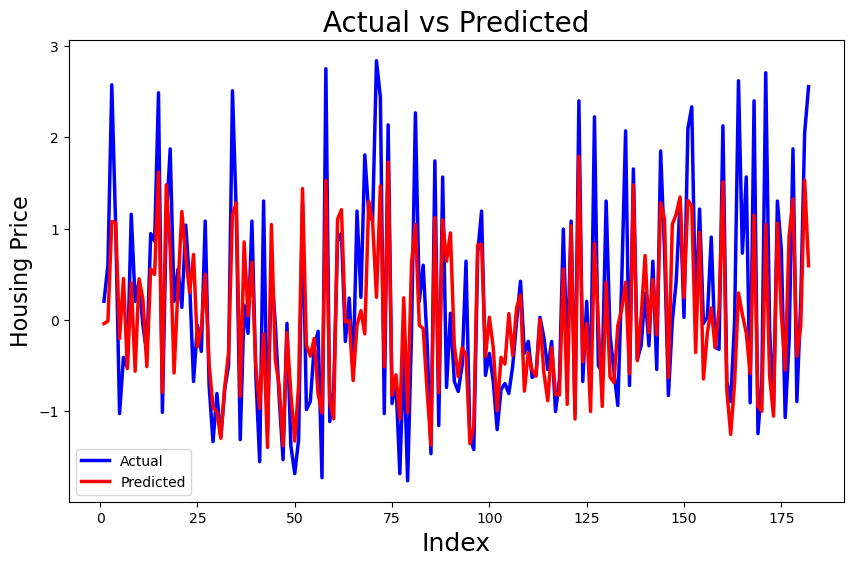

In [128]:
# "Actual vs Predicted" chart
c = np.arange(1, len(y_test) + 1)  # Definition of indexes
plt.figure(figsize=(10, 6))

# Line for actual values
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-", label="Actual")

# Line for predicted values
plt.plot(c, y_test_pred, color="red", linewidth=2.5, linestyle="-", label="Predicted")

plt.title('Actual vs Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Housing Price', fontsize=16)
plt.legend()
plt.show()